## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Importing dataset

In [2]:
df=pd.read_excel("\\users\\saura\\downloads\\hotelreviews.xlsx")

In [3]:
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4.0
1,ok nothing special charge diamond member hilto...,2.0
2,nice rooms not 4* experience hotel monaco seat...,3.0
3,"unique, great stay, wonderful time hotel monac...",5.0
4,"great stay great stay, went seahawk game aweso...",5.0


In [4]:
df.describe()

,Rating
count,20491.000000
mean,3.952223
std,1.233030
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


In [5]:
df.shape

(20491, 2)

In [6]:
df.columns

Index(['Review', 'Rating'], dtype='object')

In [7]:
df.nunique()          # Unique Values

Review    20491
Rating        5
dtype: int64

In [8]:
##Count of null values#

count=df.isnull().sum().sort_values(ascending=True)
percentage=((df.isnull().sum()/len(df)*100))
missing_data=pd.concat([count,percentage],axis=1,keys=["Count","Percentage"])##Count of null values#

count=df.isnull().sum().sort_values(ascending=True)
percentage=((df.isnull().sum()/len(df)*100))
missing_data=pd.concat([count,percentage],axis=1,keys=["Count","Percentage"])

<AxesSubplot:xlabel='Rating', ylabel='count'>

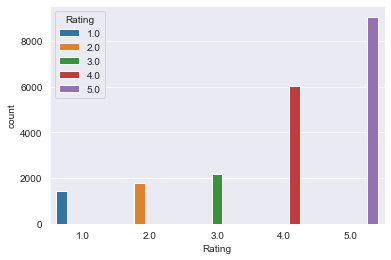

In [9]:
#Rating Count
sns.set_style("darkgrid")
sns.countplot(x="Rating",hue="Rating",data=df)

5.0    44.19
4.0    29.47
3.0    10.66
2.0     8.75
1.0     6.93
Name: Rating, dtype: float64


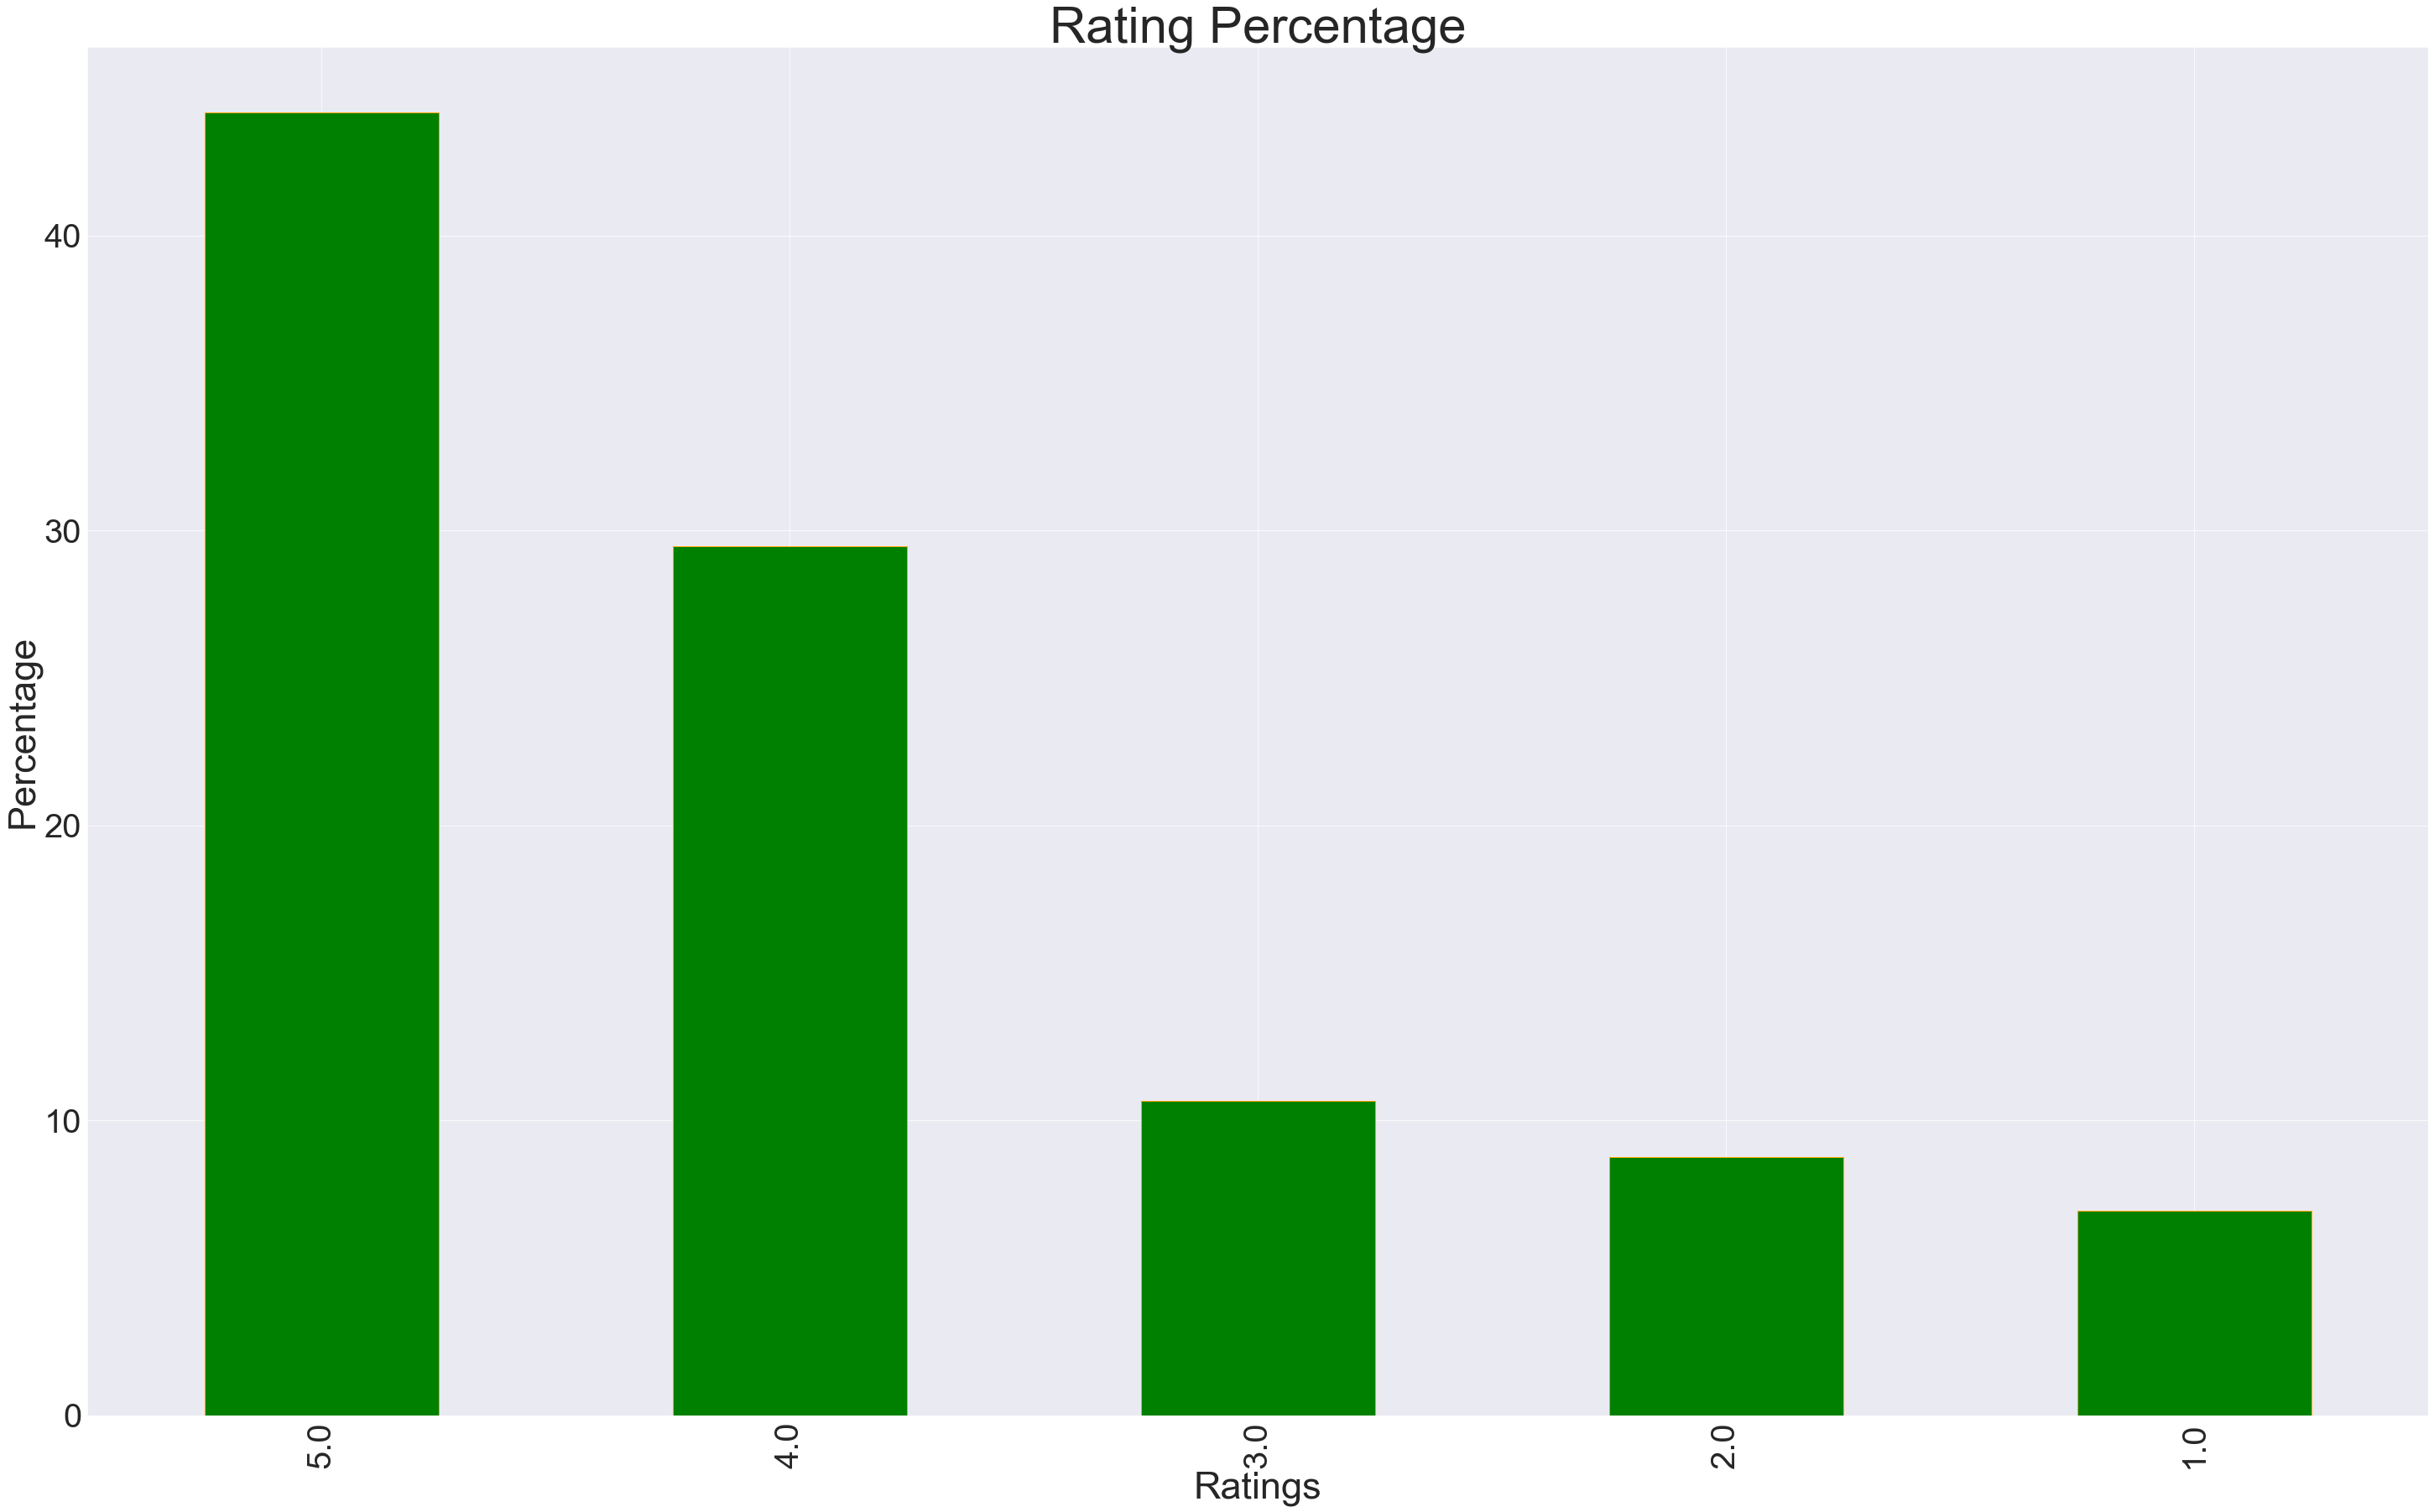

In [10]:
#Percentage of Rating distribution

print(round(df.Rating.value_counts(normalize=True)*100,2))
round(df.Rating.value_counts(normalize=True)*100,2)
round(df.Rating.value_counts(normalize=True)*100,2).plot(kind="bar",figsize=(50,30),color="green",edgecolor="orange")
plt.xlabel("Ratings",fontsize=45)
plt.ylabel("Percentage",fontsize=45)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.title("Rating Percentage",fontsize=60)
plt.show()

# Importing libraries for text preprocessing

In [11]:
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer 
from nltk.stem import WordNetLemmatizer 

lemmatizer = WordNetLemmatizer()
from nltk.tokenize import word_tokenize
nltk.download('punkt')
stemmer=PorterStemmer()
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\saura\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\saura\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [12]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
STOP_WORDS |= {"nt","hotel","room"}
print(STOP_WORDS)

{'ever', 'itself', 'please', 'call', 'neither', 'more', 'several', 'on', 'an', "'m", 'move', 'nt', 'also', 'hereupon', 'these', 'go', 'against', 'though', 'ourselves', 'empty', 'being', 'otherwise', 'would', 'how', "'re", 'by', 'show', 'doing', 'one', 'out', 'above', 'it', 'not', 'made', 'latter', 'sometime', 'others', 'he', 'yours', 'seem', 'them', 'whereafter', 'along', 'amount', "'ve", 'before', 'nine', 'seemed', 'side', 'hereby', 'various', 'keep', 'might', 'i', 'elsewhere', 'however', 'therefore', 'quite', 'and', 'whether', 'whither', 'formerly', '’ll', 'wherever', 'yourselves', 'becomes', 'front', 'yet', 'take', 'while', 'is', 'room', 'enough', 'another', 'twelve', 'get', 'nor', 'same', 'myself', 'only', 'with', "n't", 'among', 'down', 'no', 'be', 'so', 'thus', 'between', 'his', 'fifty', 'us', 'nothing', '’d', 'will', '’s', 'within', 'been', 'seeming', 'she', 'see', 'whereupon', '’re', 'eleven', 'somehow', 'much', 'moreover', 'have', 'becoming', 'own', 'either', 'should', 'as', '

In [13]:
#Cleaning of texts ie punctuations,special characters,numerical values ,lowering of letters
def text_clean(text):
    text=text.lower()
   
    text=re.sub("\[.*?\]","",text)
    text=re.sub("[%s]" % re.escape(string.punctuation),"",text)
    text=re.sub("\w*\d\w*","",text)
    text=re.sub("\n","",text)
    
    return text

In [14]:
#Applying function to dataset 
cleaned1 = lambda x: text_clean(x)
df["Cleaned_Reviews"]=pd.DataFrame(df.Review.apply(cleaned1))
df['word_count'] = df['Review'].apply(lambda x: len(str(x).split()))

In [15]:
df

,Review,Rating,Cleaned_Reviews,word_count
0,nice hotel expensive parking got good deal sta...,4.0,nice hotel expensive parking got good deal sta...,87
1,ok nothing special charge diamond member hilto...,2.0,ok nothing special charge diamond member hilto...,250
2,nice rooms not 4* experience hotel monaco seat...,3.0,nice rooms not experience hotel monaco seattl...,217
3,"unique, great stay, wonderful time hotel monac...",5.0,unique great stay wonderful time hotel monaco ...,89
4,"great stay great stay, went seahawk game aweso...",5.0,great stay great stay went seahawk game awesom...,191
...,...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5.0,best kept secret time staying charm not ca n...,109
20487,great location price view hotel great quick pl...,4.0,great location price view hotel great quick pl...,39
20488,"ok just looks nice modern outside, desk staff ...",2.0,ok just looks nice modern outside desk staff n...,63
20489,hotel theft ruined vacation hotel opened sept ...,1.0,hotel theft ruined vacation hotel opened sept ...,781


In [16]:
#Performing lemmatization


Reviews1=df.copy()
Reviews1.drop(["Review","Rating"],axis=1,inplace=True)
Reviews1["Cleaned_Reviews"][6]
corpus=[]

In [17]:
for i in range  (0,len(Reviews1)):
    review=re.sub("[^a-zA-Z]"," ",Reviews1["Cleaned_Reviews"][i])
    
    review=review.split()
    review=[lemmatizer.lemmatize(word) for word in review if not word in STOP_WORDS]
    review=" ".join(review)
    corpus.append(review)
 

In [18]:
corpus[10]

'poor value stayed monaco seattle july nice priced night take beating quotient experience simply average exceptional paying terribly disappointed wife stayed nicest suite felt like overpaying best advice shop qualitywise league average marriott nice best western'

In [19]:
df["Cleaned_Review_Lemmatized"]=corpus

#Polarity and subjectivity

In [20]:
import textblob
from textblob import TextBlob

df["Polarity"]=df["Cleaned_Review_Lemmatized"].apply(lambda x:TextBlob(x).sentiment.polarity)
df["Subjectivity"]=df["Cleaned_Review_Lemmatized"].apply(lambda x:TextBlob(x).sentiment.subjectivity)

def sentiment(x):
    if x<0:
        return 'negative'
    elif x==0:
        return 'neutral'
    else:
        return 'positive'
    
df['polarity_score']=df['Polarity'].\
   map(lambda x: sentiment(x))

pos = [5,4,3]
neg = [1]
neu=[2]

def sentiment(rating):
  if rating in pos:
    return "positive"
  elif rating in neg:
    return "negative"
  elif rating in neu:
      return "neutral"
 
df['Sentiment'] = df['Rating'].apply(sentiment)

In [21]:
df

,Review,Rating,Cleaned_Reviews,word_count,Cleaned_Review_Lemmatized,Polarity,Subjectivity,polarity_score,Sentiment
0,nice hotel expensive parking got good deal sta...,4.0,nice hotel expensive parking got good deal sta...,87,nice expensive parking got good deal stay anni...,0.208744,0.687000,positive,positive
1,ok nothing special charge diamond member hilto...,2.0,ok nothing special charge diamond member hilto...,250,ok special charge diamond member hilton decide...,0.250063,0.532803,positive,neutral
2,nice rooms not 4* experience hotel monaco seat...,3.0,nice rooms not experience hotel monaco seattl...,217,nice room experience monaco seattle good level...,0.294420,0.605208,positive,positive
3,"unique, great stay, wonderful time hotel monac...",5.0,unique great stay wonderful time hotel monaco ...,89,unique great stay wonderful time monaco locati...,0.504825,0.691228,positive,positive
4,"great stay great stay, went seahawk game aweso...",5.0,great stay great stay went seahawk game awesom...,191,great stay great stay went seahawk game awesom...,0.469643,0.627296,positive,positive
...,...,...,...,...,...,...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5.0,best kept secret time staying charm not ca n...,109,best kept secret time staying charm beat time ...,0.228716,0.532804,positive,positive
20487,great location price view hotel great quick pl...,4.0,great location price view hotel great quick pl...,39,great location price view great quick place si...,0.503704,0.622222,positive,positive
20488,"ok just looks nice modern outside, desk staff ...",2.0,ok just looks nice modern outside desk staff n...,63,ok look nice modern outside desk staff particu...,0.171220,0.524304,positive,neutral
20489,hotel theft ruined vacation hotel opened sept ...,1.0,hotel theft ruined vacation hotel opened sept ...,781,theft ruined vacation opened sept guest week h...,0.142133,0.525249,positive,negative


In [22]:
# Percentage of Sentiment's class
Df_sentiment = pd.DataFrame(df.Sentiment.value_counts(normalize=True)*100)
 
# calculating percentage 0F sentiment
Df_sentiment['Total'] = df.Sentiment.value_counts()

In [23]:
Df_sentiment

,Sentiment,Total
positive,84.315065,17277
neutral,8.750183,1793
negative,6.934752,1421


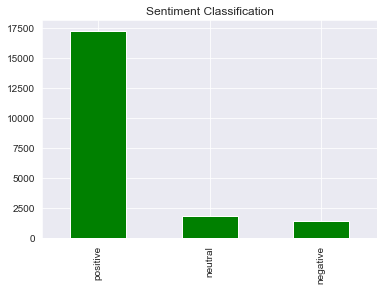

In [24]:
# Ratio of Sentiments
df.Sentiment.value_counts().plot(kind='bar', color='green')
plt.title('Sentiment Classification')
plt.show()

Text(0, 0.5, 'Subjectivity')

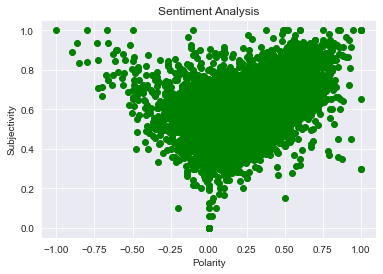

In [25]:
plt.scatter(df.Polarity, df.Subjectivity, color='green')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

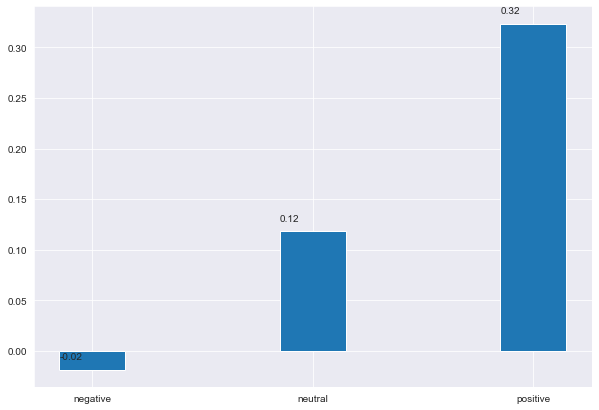

In [26]:
mean_pol = df.groupby('Sentiment')['Polarity'].agg([np.mean])
mean_pol.columns = ['mean_polarity']
fig , ax = plt.subplots(figsize = (10,7))
plt.bar(mean_pol.index, mean_pol.mean_polarity, width =0.3)
for i in ax.patches:
    ax.text(i.get_x(), i.get_height()+0.01, str("{:.2f}".format(i.get_height())))


<AxesSubplot:xlabel='Sentiment', ylabel='count'>

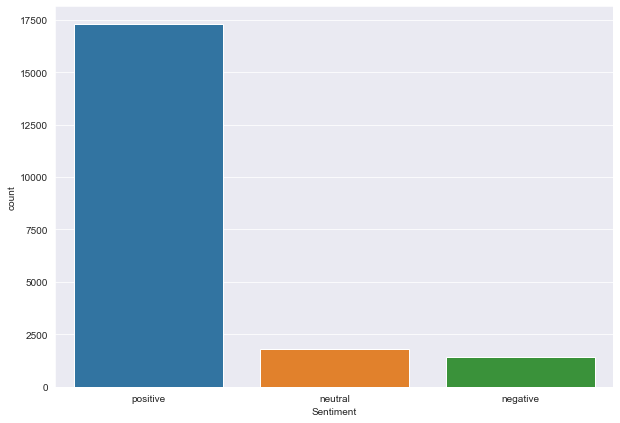

In [27]:
fig = plt.figure(figsize=(10,7))
sns.countplot(x='Sentiment', data = df)

Text(0.5, 1.0, 'Distribution of Sentiments')

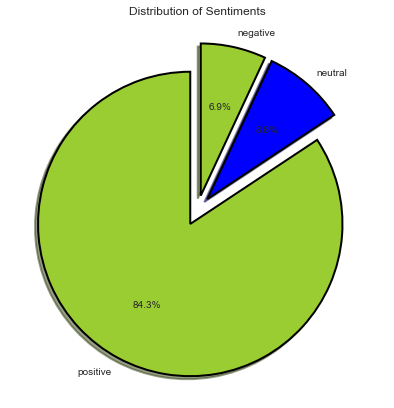

In [28]:
###Distribution Of Sentiments
fig = plt.figure(figsize=(10,7))
colors = ("yellowgreen", "blue")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = df['Sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of Sentiments')

In [29]:
### Generate wordcloud

In [30]:
# Joining the list into one string/text
text = ' '.join(df.Cleaned_Review_Lemmatized)
text[:1000]

'nice expensive parking got good deal stay anniversary arrived late evening took advice previous review valet parking check quick easy little disappointed nonexistent view clean nice size bed comfortable woke stiff neck high pillow soundproof like heard music night morning loud bang door opening closing hear people talking hallway maybe noisy neighbor aveda bath product nice goldfish stay nice touch taken advantage staying longer location great walking distance shopping overall nice experience having pay parking night ok special charge diamond member hilton decided chain shot anniversary seattle start booked suite paid extra website description suite bedroom bathroom standard took printed reservation desk showed said thing like tv couch ect desk clerk told oh mixed suite description kimpton website sorry free breakfast got kidding embassy suit sitting bathroom bedroom unlike kimpton call suite day stay offer correct false advertising send kimpton preferred guest website email asking fa

In [31]:
from nltk.corpus import stopwords
import nltk
nltk.download("stopwords")
chachedWords = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saura\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


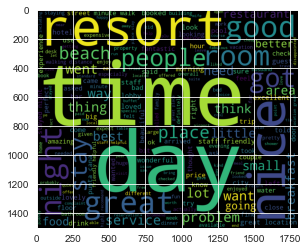

In [32]:
# Generate wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#stopwords = STOPWORDS
#stopwords.add('will')
wordcloud_stw = WordCloud(
                background_color= 'black',
                width = 1800,
                height = 1500
                ).generate(text)
plt.imshow(wordcloud_stw)

# Positive

In [33]:
pos_rev = df[df.Sentiment == 'positive']
pos_rev = pos_rev.sort_values(['Polarity'], ascending= True)
pos_rev.head()

,Review,Rating,Cleaned_Reviews,word_count,Cleaned_Review_Lemmatized,Polarity,Subjectivity,polarity_score,Sentiment
4760,greta london base stayed london bridge march i...,5.0,greta london base stayed london bridge march i...,20,greta london base stayed london bridge march i...,-0.800000,1.000000,negative,positive
10824,hotel businness just 3 day stay montecarlo pic...,5.0,hotel businness just day stay montecarlo pick...,29,businness day stay montecarlo picked based rev...,-0.475000,0.400000,negative,positive
480,"beware beware leave vehicle, took advantage pa...",3.0,beware beware leave vehicle took advantage par...,11,beware beware leave vehicle took advantage par...,-0.450000,0.700000,negative,positive
3802,place stay d.r travelled dominican 9 times yea...,5.0,place stay dr travelled dominican times years...,47,place stay dr travelled dominican time year ki...,-0.400000,0.875000,negative,positive
3199,"disgusted comments just wanted make comments, ...",5.0,disgusted comments just wanted make comments n...,51,disgusted comment wanted comment notice bad re...,-0.344898,0.531973,negative,positive


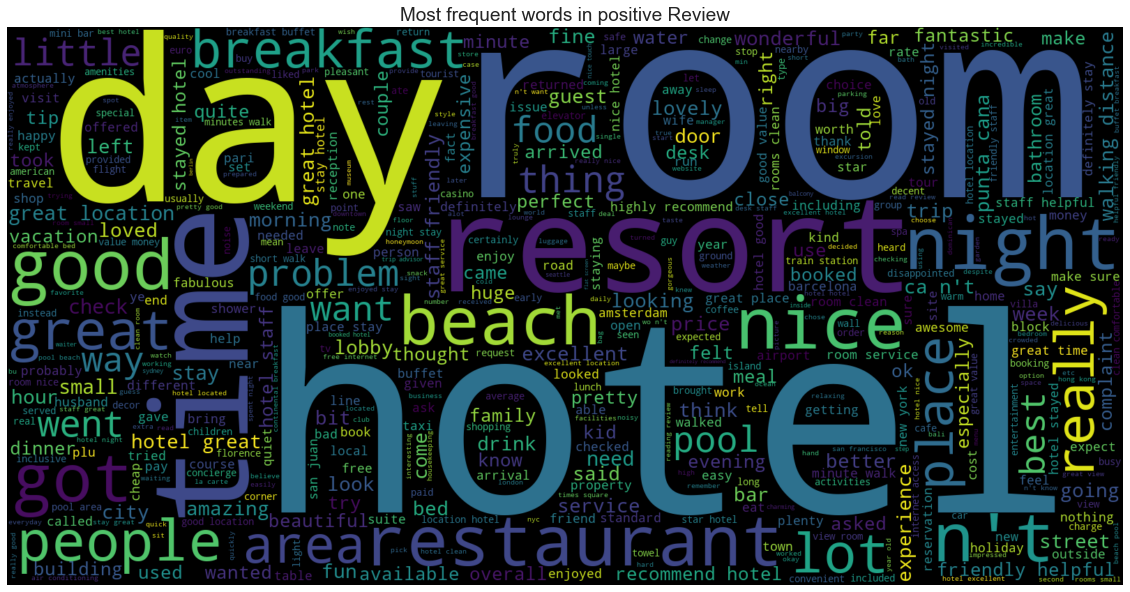

In [34]:
text = ' '.join([word for word in pos_rev['Review']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in positive Review', fontsize=19)
plt.show()

# Negative

In [35]:
neg_rev = df[df.Sentiment == 'negative']
neg_rev = neg_rev.sort_values(['Polarity'], ascending= False)
neg_rev.head()

,Review,Rating,Cleaned_Reviews,word_count,Cleaned_Review_Lemmatized,Polarity,Subjectivity,polarity_score,Sentiment
2107,"copley house not good experience, avoid place ...",1.0,copley house not good experience avoid place l...,21,copley house good experience avoid place like ...,0.7000,0.600000,positive,negative
18904,hola not good husband just got married beach r...,1.0,hola not good husband just got married beach r...,60,hola good husband got married beach resort hon...,0.6375,0.706250,positive,negative
3355,skip just returned puerto rico inform going sk...,1.0,skip just returned puerto rico inform going sk...,14,skip returned puerto rico inform going skip en...,0.6250,0.750000,positive,negative
2718,beware overbook lobby disaster people complain...,1.0,beware overbook lobby disaster people complain...,72,beware overbook lobby disaster people complain...,0.5500,0.657778,positive,negative
10321,"hotel, torre guelfa leaves lot desired, husban...",1.0,hotel torre guelfa leaves lot desired husband ...,45,torre guelfa leaf lot desired husband paid lot...,0.5250,0.612500,positive,negative


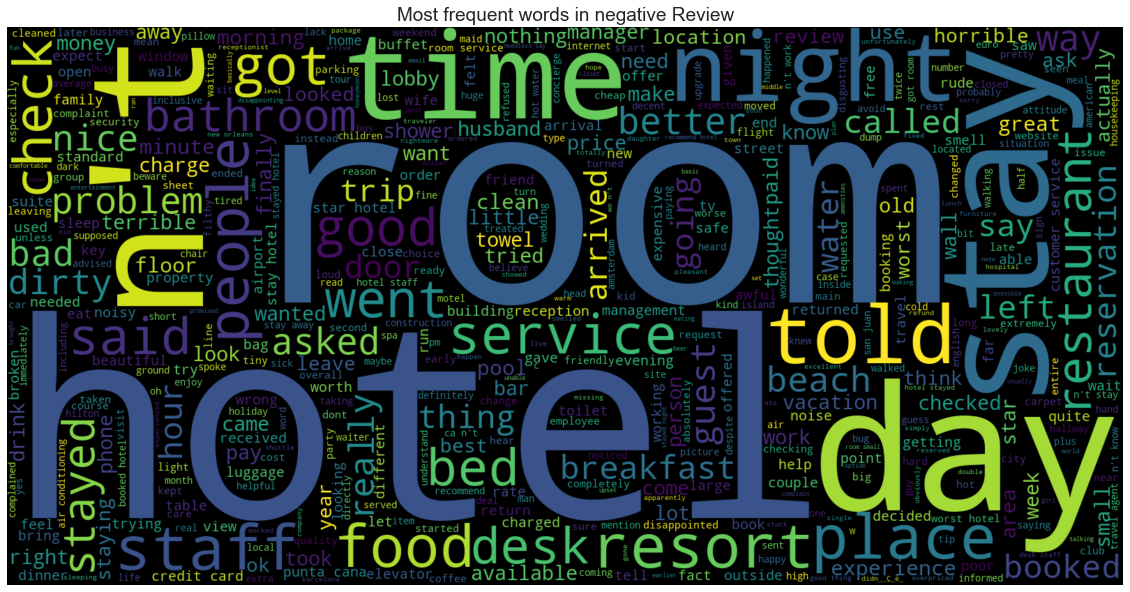

In [36]:
text = ' '.join([word for word in neg_rev['Review']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in negative Review', fontsize=19)
plt.show()

# Neutral

In [37]:
neu_rev = df[df.Sentiment == 'neutral']
neu_rev = neg_rev.sort_values(['Polarity'], ascending= False)
neu_rev.head()

,Review,Rating,Cleaned_Reviews,word_count,Cleaned_Review_Lemmatized,Polarity,Subjectivity,polarity_score,Sentiment
2107,"copley house not good experience, avoid place ...",1.0,copley house not good experience avoid place l...,21,copley house good experience avoid place like ...,0.7000,0.600000,positive,negative
18904,hola not good husband just got married beach r...,1.0,hola not good husband just got married beach r...,60,hola good husband got married beach resort hon...,0.6375,0.706250,positive,negative
3355,skip just returned puerto rico inform going sk...,1.0,skip just returned puerto rico inform going sk...,14,skip returned puerto rico inform going skip en...,0.6250,0.750000,positive,negative
2718,beware overbook lobby disaster people complain...,1.0,beware overbook lobby disaster people complain...,72,beware overbook lobby disaster people complain...,0.5500,0.657778,positive,negative
10321,"hotel, torre guelfa leaves lot desired, husban...",1.0,hotel torre guelfa leaves lot desired husband ...,45,torre guelfa leaf lot desired husband paid lot...,0.5250,0.612500,positive,negative


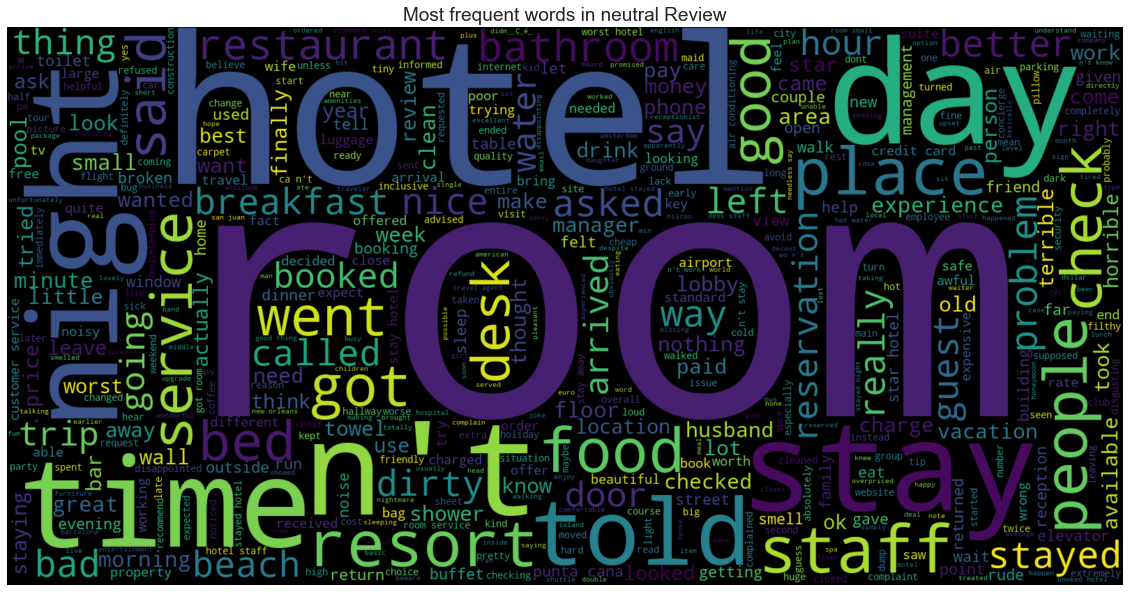

In [38]:
text = ' '.join([word for word in neg_rev['Review']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in neutral Review', fontsize=19)
plt.show()

# Feature Generation

# 1. Frequency Charts(BoW)

This is common practice in text data analysis to make charts of the frequency of words.

That gives a good idea about what people are talking about most in this text.

First, find the frequency of each word in the review column of the dataset.

Then plot the top 20 words based on the frequency.

In [39]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n_words(corpus, n=None):
    vec=CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df['Review'], 20)
df1 = pd.DataFrame(common_words, columns = ['Review', 'count'])
df1.head()

,Review,count
0,hotel,49814
1,room,35330
2,not,31709
3,great,21475
4,good,17412


Here is the bar plot of the frequency of the top 20 words:

<AxesSubplot:title={'center':'Bar Chart of Top Words Frequency'}, xlabel='Top Words', ylabel='Count'>

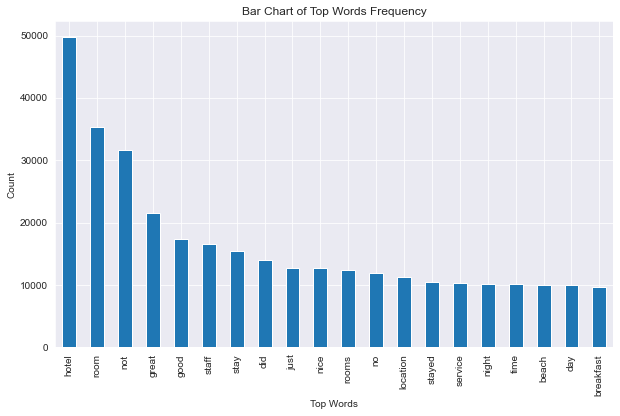

In [40]:
df1.groupby('Review').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(10, 6),
    xlabel = "Top Words",
    ylabel = "Count",
    title = "Bar Chart of Top Words Frequency"
)

# 2.Part Of Speech Tagging

<AxesSubplot:title={'center':'Bar Chart of the Frequency of the Parts of Speech'}, xlabel='Part Of Speech', ylabel='Frequency'>

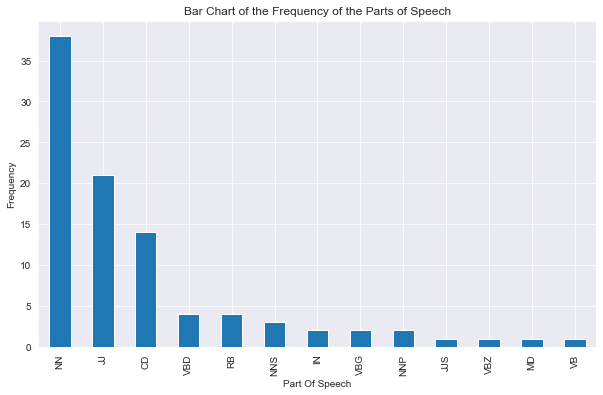

In [41]:
blob = TextBlob(str(df['Review']))
pos_df = pd.DataFrame(blob.tags, columns = ['word', 'pos'])
pos_df = pos_df.pos.value_counts()[:30]
pos_df.plot(kind='bar',
            xlabel = "Part Of Speech",
           ylabel = "Frequency",
           title = "Bar Chart of the Frequency of the Parts of Speech",
           figsize=(10, 6))

In [42]:
df

,Review,Rating,Cleaned_Reviews,word_count,Cleaned_Review_Lemmatized,Polarity,Subjectivity,polarity_score,Sentiment
0,nice hotel expensive parking got good deal sta...,4.0,nice hotel expensive parking got good deal sta...,87,nice expensive parking got good deal stay anni...,0.208744,0.687000,positive,positive
1,ok nothing special charge diamond member hilto...,2.0,ok nothing special charge diamond member hilto...,250,ok special charge diamond member hilton decide...,0.250063,0.532803,positive,neutral
2,nice rooms not 4* experience hotel monaco seat...,3.0,nice rooms not experience hotel monaco seattl...,217,nice room experience monaco seattle good level...,0.294420,0.605208,positive,positive
3,"unique, great stay, wonderful time hotel monac...",5.0,unique great stay wonderful time hotel monaco ...,89,unique great stay wonderful time monaco locati...,0.504825,0.691228,positive,positive
4,"great stay great stay, went seahawk game aweso...",5.0,great stay great stay went seahawk game awesom...,191,great stay great stay went seahawk game awesom...,0.469643,0.627296,positive,positive
...,...,...,...,...,...,...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5.0,best kept secret time staying charm not ca n...,109,best kept secret time staying charm beat time ...,0.228716,0.532804,positive,positive
20487,great location price view hotel great quick pl...,4.0,great location price view hotel great quick pl...,39,great location price view great quick place si...,0.503704,0.622222,positive,positive
20488,"ok just looks nice modern outside, desk staff ...",2.0,ok just looks nice modern outside desk staff n...,63,ok look nice modern outside desk staff particu...,0.171220,0.524304,positive,neutral
20489,hotel theft ruined vacation hotel opened sept ...,1.0,hotel theft ruined vacation hotel opened sept ...,781,theft ruined vacation opened sept guest week h...,0.142133,0.525249,positive,negative


In [43]:
df.to_csv("cleaned_data.csv")


In [44]:
cleaned1 = lambda x: text_clean(x)

# 4. Building Model

In [45]:
import pandas as pd
import numpy
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
#Splitting data into test and train#


# Using TF-IDF #

In [46]:
tv = TfidfVectorizer(max_features=13000)
X = tv.fit_transform(df["Cleaned_Review_Lemmatized"]).toarray()
X_feat=pd.DataFrame(X)

Reviews=pd.concat([df["Sentiment"],X_feat],axis=1)
Reviews.shape
Reviews.head(10)
X=Reviews.iloc[:,1:13001]
Y=Reviews.iloc[:,0]
Y2=Y.values.reshape(1,-1)
X_train1,X_test1,Y_train1,Y_test1=train_test_split(X,Y,test_size=0.3)
Reviews.shape
Reviews.head(10)


classifier_NB = GaussianNB()
classifier_NB.fit(X_train1, Y_train1)
pred_NB_train=classifier_NB.predict(X_train1)
np.mean(pred_NB_train==Y_train1)
pred_NB_test=classifier_NB.predict(X_test1)
np.mean(pred_NB_test==Y_test1)

0.6341899804814574

# Adaboost Classifier 

In [47]:
classifier_ADA=AdaBoostClassifier()
classifier_ADA.fit(X_train1,Y_train1)
pred_ADA_train=classifier_ADA.predict(X_train1)
np.mean(pred_ADA_train==Y_train1)
pred_ADA_test=classifier_ADA.predict(X_test1)
np.mean(pred_ADA_test==Y_test1)

0.876057254391672

# Random Forest Classifier

In [48]:
classifier_RF=RandomForestClassifier()
classifier_RF.fit(X_train1,Y_train1)
pred_RF_train=classifier_RF.predict(X_train1)
np.mean(pred_RF_train==Y_train1)
pred_RF_test=classifier_RF.predict(X_test1)
np.mean(pred_RF_test==Y_test1)

0.8527976577748861

In [54]:
positive=Reviews[Reviews["Sentiment"]=="positive"]
negative=Reviews[Reviews["Sentiment"]=="negative"]
neutral=Reviews[Reviews["Sentiment"]=="neutral"]

In [55]:
print(positive.shape,negative.shape)

(17277, 13001) (1421, 13001)


In [56]:
#Performing under sampling#
from imblearn.under_sampling import NearMiss

nm = NearMiss()
X1,Y1=nm.fit_resample(X,Y)

X_train, X_test, Y_train, Y_test = train_test_split(X1, Y1, test_size = 0.3)

classifier_NB = GaussianNB()
classifier_NB.fit(X_train, Y_train)
pred_NB_train=classifier_NB.predict(X_train)
np.mean(pred_NB_train==Y_train)
pred_NB_test=classifier_NB.predict(X_test)
np.mean(pred_NB_test==Y_test)

0.45269741985926504

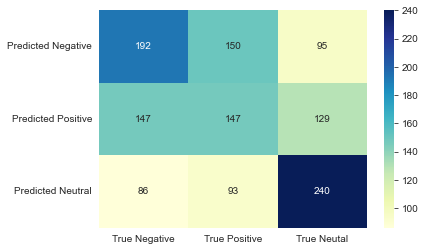

In [58]:
confusion_matrix(pred_NB_test,Y_test)
cm_classifier_NB = confusion_matrix(Y_test,pred_NB_test)
#print('Confusion matrix\n', cm)
cm_matrix_NB = pd.DataFrame(data=cm_classifier_NB, columns=['True Negative',  'True Positive', 'True Neutal'], 
                        index=['Predicted Negative', 'Predicted Positive', 'Predicted Neutral'])
sns.heatmap(cm_matrix_NB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

In [59]:
classifier_MNB = MultinomialNB()
classifier_MNB.fit(X_train, Y_train)
pred_MNB_train=classifier_MNB.predict(X_train)
np.mean(pred_MNB_train==Y_train)
pred_MNB_test=classifier_MNB.predict(X_test)
np.mean(pred_MNB_test==Y_test)

0.6669272869429241

In [60]:
classifier_DT = DecisionTreeClassifier(criterion = "entropy", random_state = 0)
classifier_DT.fit(X_train,Y_train)
pred_DT_train=classifier_DT.predict(X_train)
np.mean(pred_DT_train==Y_train)
pred_DT_test=classifier_DT.predict(X_test)
np.mean(pred_DT_test==Y_test)

0.5582486317435497

In [61]:
classifier_LR=LogisticRegression()
classifier_LR.fit(X_train,Y_train)
pred_LR_train=classifier_LR.predict(X_train)
np.mean(pred_LR_train==Y_train)
pred_LR_test=classifier_LR.predict(X_test)
np.mean(pred_LR_test==Y_test)

0.7427677873338546

In [62]:
classifier_ADA=AdaBoostClassifier()
classifier_ADA.fit(X_train,Y_train)
pred_ADA_train=classifier_ADA.predict(X_train)
np.mean(pred_ADA_train==Y_train)
pred_ADA_test=classifier_ADA.predict(X_test)
np.mean(pred_ADA_test==Y_test)

0.6442533229085223

In [63]:
classifier_RF=RandomForestClassifier()
classifier_RF.fit(X_train,Y_train)
pred_RF_train=classifier_RF.predict(X_train)
np.mean(pred_RF_train==Y_train)
pred_RF_test=classifier_RF.predict(X_test)
np.mean(pred_RF_test==Y_test)

0.6903831118060985

In [64]:
classifier_SVM=SVC()
classifier_SVM.fit(X_train,Y_train)
pred_SVM_train=classifier_SVM.predict(X_train)
np.mean(pred_SVM_train==Y_train)
pred_SVM_test=classifier_SVM.predict(X_test)
np.mean(pred_SVM_test==Y_test)

0.7443315089913995

In [65]:
classifier_KNN=KNeighborsClassifier()
classifier_KNN.fit(X_train,Y_train)
pred_KNN_train=classifier_KNN.predict(X_train)
np.mean(pred_KNN_train==Y_train)
pred_KNN_test=classifier_KNN.predict(X_test)
np.mean(pred_KNN_test==Y_test)

0.5433932759968726

# Hyper parameter tuning of SVM

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters=[{'C':[1,10,100,1000],'kernel':['linear']},{'C':[1,10,100,1000],'kernel':['rbf'],'gamma':[0.1,0.2,0.3,0.4,0.5,0.6,0.8,0.9]}]
grid_search=GridSearchCV(estimator=classifier_SVM,param_grid=parameters,scoring='accuracy',cv=10,n_jobs=-1)

grid=grid_search.fit(X_train,Y_train)
grid.best_params_

classifier_SVM_tuned=SVC(kernel="linear",C=10)
classifier_SVM_tuned.fit(X_train,Y_train)
pred_SVM_train=classifier_SVM_tuned.predict(X_train)
np.mean(pred_SVM_train==Y_train)
pred_SVM_test=classifier_SVM_tuned.predict(X_test)
np.mean(pred_SVM_test==Y_test)

# Hyper parameter tuning of KNN

In [ ]:
num_folds = 10
seed = 7
scoring = 'accuracy'

from sklearn.neighbors import KNeighborsClassifier
classifier_KNN=KNeighborsClassifier()
neighbors = [1,3,5,7,9,11,13,15,17,19,21]
param_grid = dict(n_neighbors=neighbors)

kfold = KFold(n_splits=num_folds, random_state=seed)
grid_model_knn = GridSearchCV(estimator=classifier_KNN, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_model_knn.best_params_


classifier_KNN_tuned=KNeighborsClassifier(n_neighbors=9)
classifier_KNN_tuned.fit(X_train,Y_train)
pred_KNN_train=classifier_KNN_tuned.predict(X_train)
np.mean(pred_KNN_train==Y_train)
pred_KNN_test=classifier_KNN_tuned.predict(X_test)
np.mean(pred_KNN_test==Y_test)

# Hyper parameter tuning of Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import GridSearchCV 
  
# Creating the hyperparameter grid 
c_space = np.logspace(-5, 8, 15) 
param_grid = {'C': c_space} 
  
# Instantiating logistic regression classifier 
classifier_LR = LogisticRegression() 
  
# Instantiating the GridSearchCV object 
grid_search_KNN= GridSearchCV(classifier_LR, param_grid, cv = 5) 
  
grid_search_KNN.fit(X_train,Y_train) 
grid_search_KNN.best_params_


classifier_LR_tuned=LogisticRegression(C=2275.845926074791)
classifier_LR_tuned.fit(X_train,Y_train)
pred_LR_train=classifier_LR_tuned.predict(X_train)
np.mean(pred_LR_train==Y_train)
pred_LR_test=classifier_LR_tuned.predict(X_test)
np.mean(pred_LR_test==Y_test)